In [ ]:
import pandas as pd

data=pd.read_csv('/content/Advertising.csv')

In [ ]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Text(0, 0.5, 'Sales')

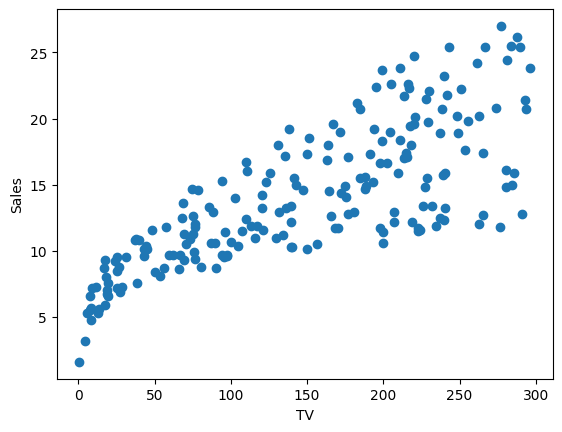

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['TV'],data['sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

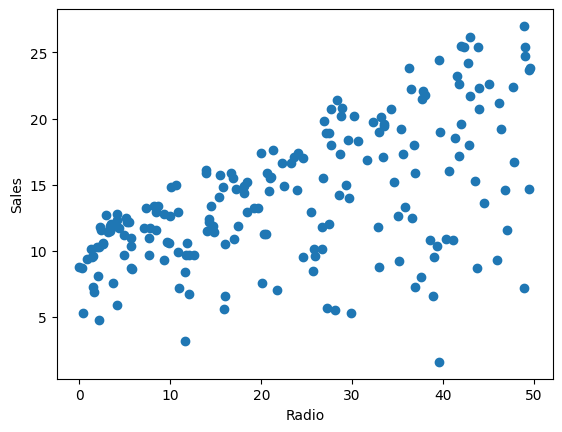

In [ ]:
plt.scatter(data['radio'],data['sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

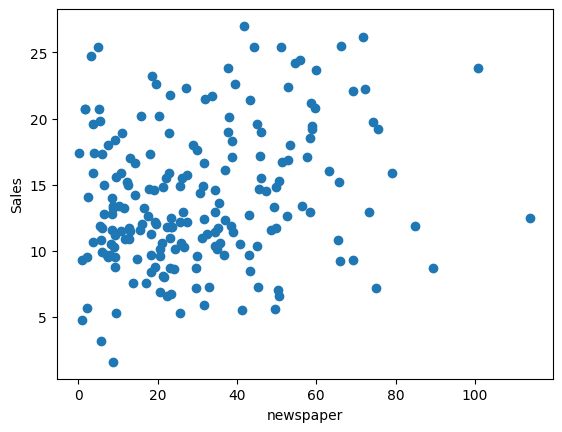

In [ ]:

plt.scatter(data['newspaper'],data['sales'])
plt.xlabel('newspaper')
plt.ylabel('Sales')

<Axes: xlabel='newspaper', ylabel='Density'>

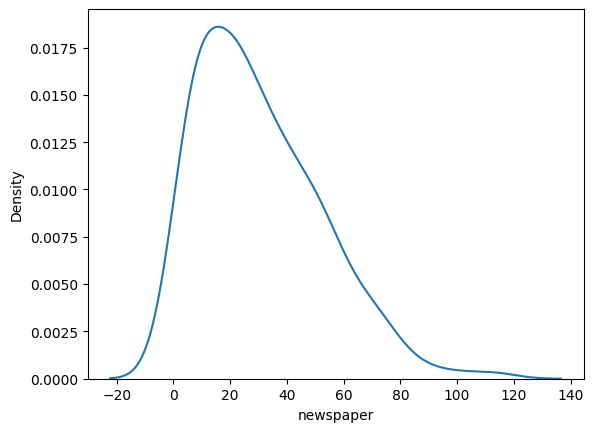

In [ ]:
import seaborn as sns

sns.kdeplot(data['newspaper'])

<Axes: xlabel='radio', ylabel='Density'>

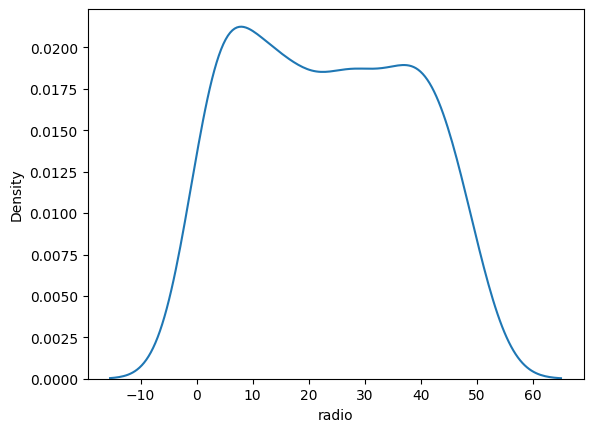

In [ ]:
sns.kdeplot(data['radio'])

<Axes: xlabel='TV', ylabel='Density'>

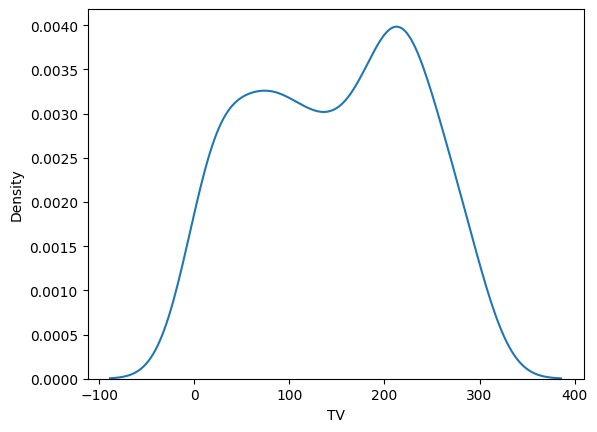

In [ ]:
sns.kdeplot(data['TV'])

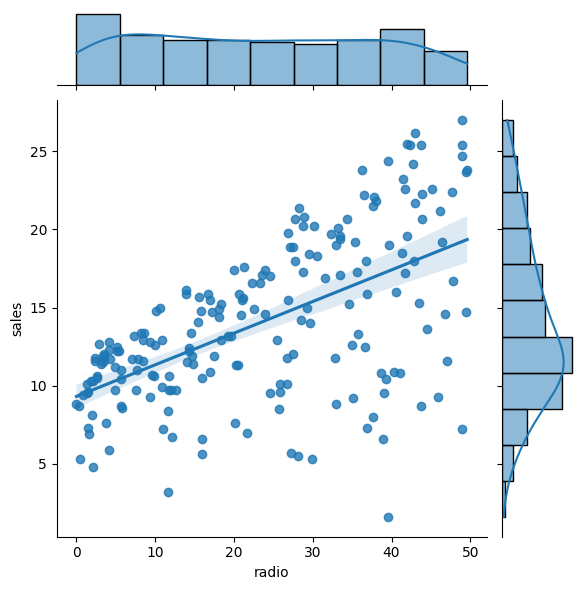

In [ ]:
sns.jointplot(x="radio", y="sales", data=data, kind="reg")


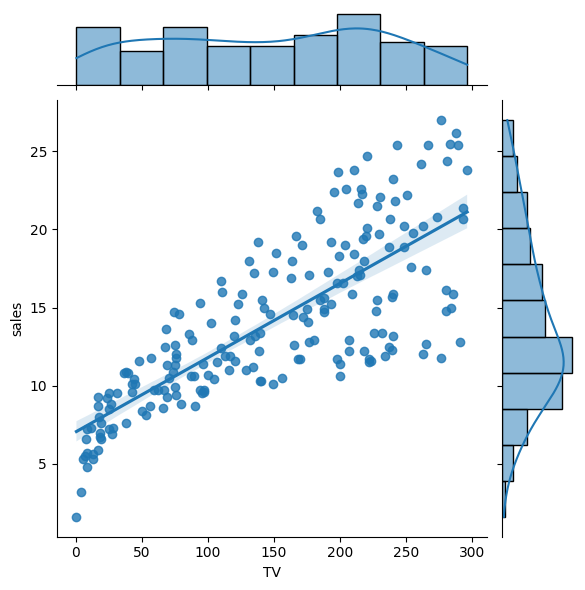

In [ ]:
sns.jointplot(x="TV", y="sales", data=data, kind="reg")


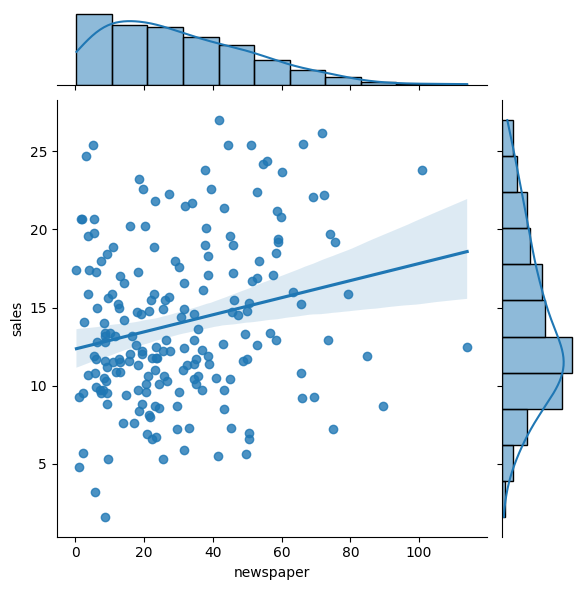

In [ ]:
sns.jointplot(x="newspaper", y="sales", data=data, kind="reg")


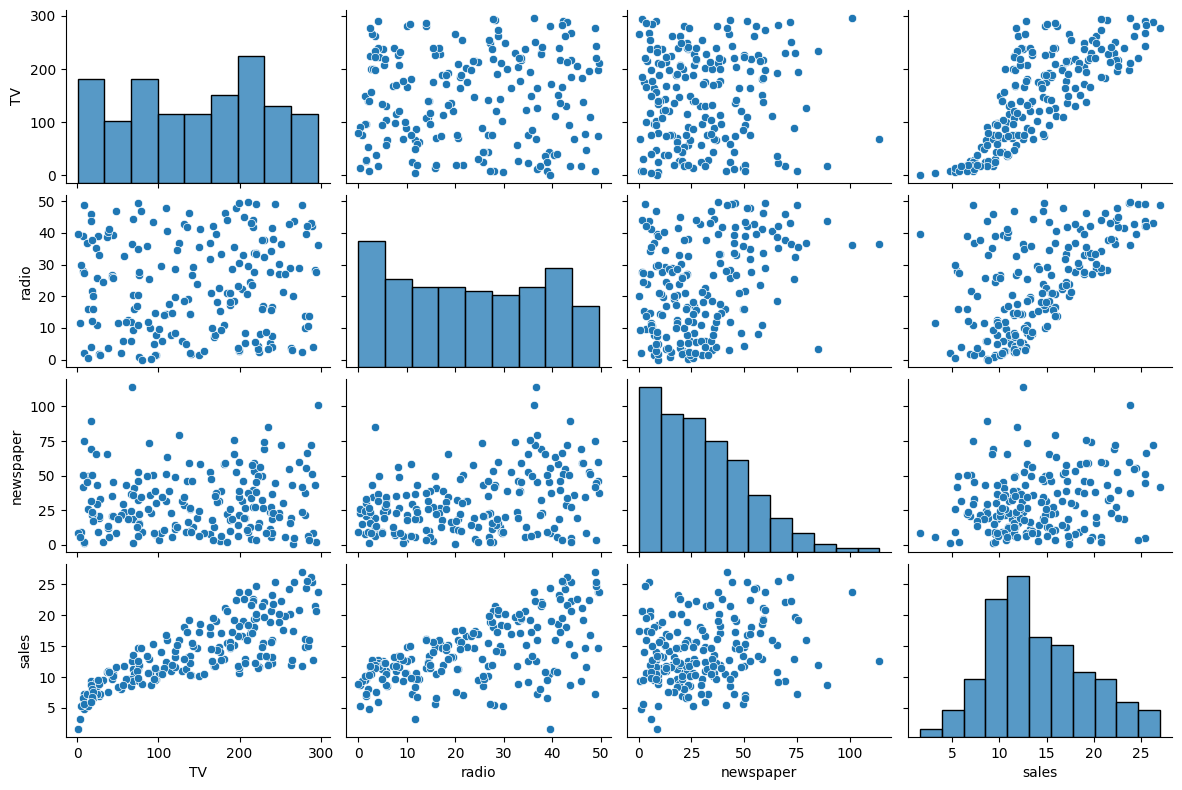

In [ ]:
sns.pairplot(data,height=2,aspect=1.5)

<Axes: >

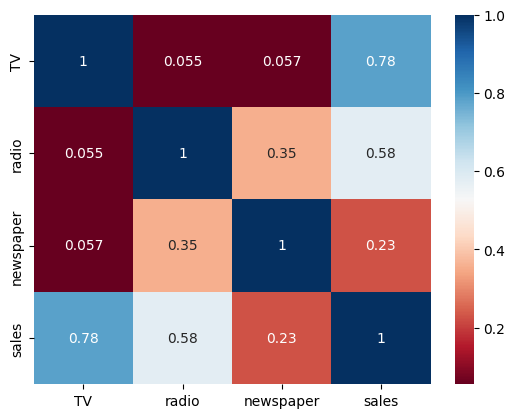

In [ ]:
sns.heatmap(data.corr(),cmap='RdBu',annot=True)

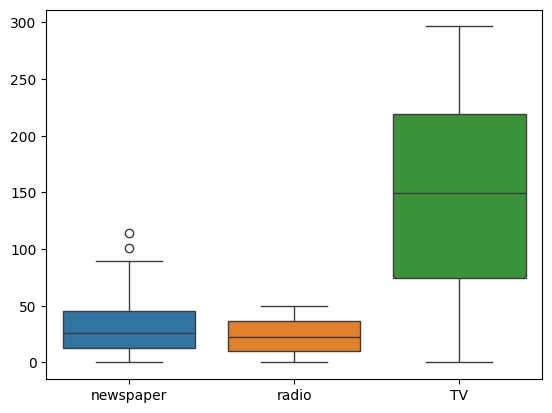

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data[['newspaper', 'radio', 'TV']])
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler


sd=StandardScaler()


data_scaled=sd.fit_transform(data[['TV','radio','newspaper']])


In [ ]:
data_scaled.shape

(200, 3)

In [ ]:
from sklearn.preprocessing import power_transform

data['TV_YEO'] = power_transform(data[['TV']], method='yeo-johnson')


In [ ]:
data

,TV,radio,newspaper,sales,TV_YEO
0,230.1,37.8,69.2,22.1,0.948674
1,44.5,39.3,45.1,10.4,-1.191314
2,17.2,45.9,69.3,9.3,-1.647757
3,151.5,41.3,58.5,18.5,0.141020
4,180.8,10.8,58.4,12.9,0.452715
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,-1.287908
196,94.2,4.9,8.1,9.7,-0.520949
197,177.0,9.3,6.4,12.8,0.413091
198,283.6,42.0,66.2,25.5,1.455843


<Axes: xlabel='TV_YEO', ylabel='Density'>

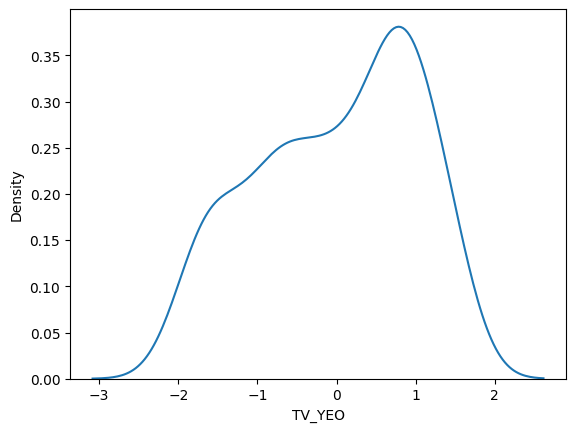

In [ ]:
sns.kdeplot(data['TV_YEO'])

In [ ]:
from scipy.stats import skew

print("Before:", skew(data['TV']))
print("After Yeo-Johnson:", skew(data['TV_YEO']))


Before: -0.06932836662244649
After Yeo-Johnson: -0.31283050351571906


In [ ]:
from statsmodels.api import OLS,add_constant

In [ ]:
x=data.copy()

In [ ]:
x=add_constant(x)

In [ ]:
x.head()

,const,TV,radio,newspaper,sales,TV_YEO
0,1.0,230.1,37.8,69.2,22.1,0.948674
1,1.0,44.5,39.3,45.1,10.4,-1.191314
2,1.0,17.2,45.9,69.3,9.3,-1.647757
3,1.0,151.5,41.3,58.5,18.5,0.141020
4,1.0,180.8,10.8,58.4,12.9,0.452715


In [ ]:
x.drop('TV_YEO',axis=1,inplace=True)

In [ ]:
data_scaled.shape

(200, 3)

In [ ]:
x_new=add_constant(data_scaled)

In [ ]:
x_new.shape

(200, 4)

In [ ]:
y=data['sales']

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x_new,y,test_size=0.2,random_state=42)

In [ ]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((160, 4), (40, 4), (160,), (40,))

In [ ]:
model=OLS(train_y,train_x).fit()

In [ ]:
pred=model.predict(test_x)

In [ ]:
pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

<Axes: ylabel='Density'>

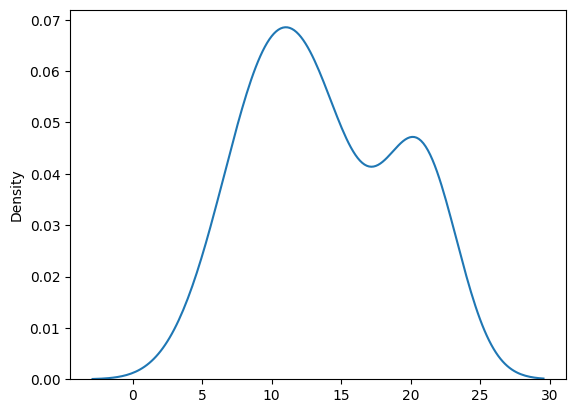

In [ ]:
sns.kdeplot(pred)

In [ ]:
print('test_x:',test_x.shape)
print('pred:',pred.shape)

test_x: (40, 4)
pred: (40,)


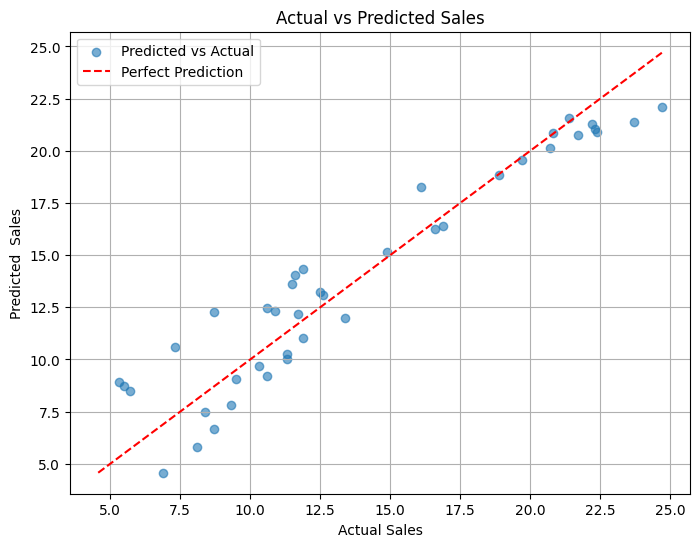

In [ ]:
import matplotlib.pyplot as plt

# Extract actual and predicted values
actual = test_y
predicted = pred

# Calculate the range for the diagonal line
min_val = min(actual.min(), predicted.min())
max_val = max(actual.max(), predicted.max())

# Plot scatter
plt.figure(figsize=(8,6))
plt.scatter(actual, predicted, alpha=0.6, label="Predicted vs Actual")

# Plot reference line y = x
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Labels and formatting
plt.xlabel("Actual Sales")
plt.ylabel("Predicted  Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_x.shape

(40, 4)

Text(0, 0.5, 'sales')

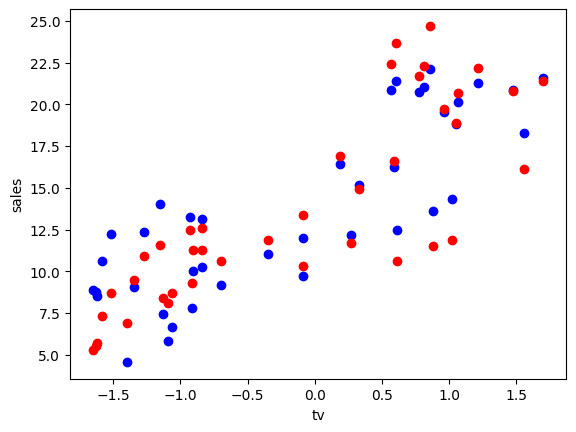

In [ ]:
plt.scatter(test_x[:,1],pred,color='blue')
plt.scatter(test_x[:,1],test_y,color='red')
plt.xlabel('tv')
plt.ylabel('sales')


Text(0, 0.5, 'radio')

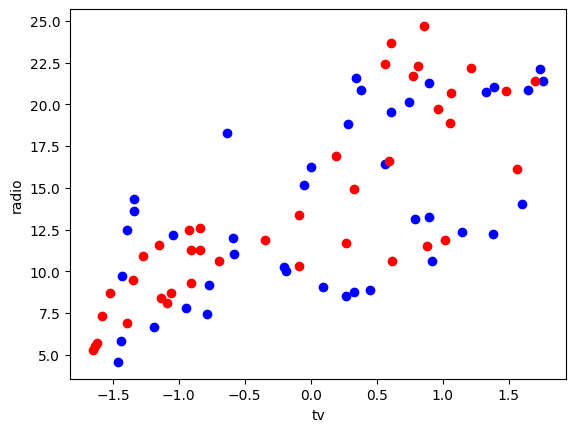

In [ ]:
plt.scatter(test_x[:,2],pred,color='blue')
plt.scatter(test_x[:,1],test_y,color='red')
plt.xlabel('tv')
plt.ylabel('radio')


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.53e-76
Time:                        14:52:22   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0420      0.132    106.501      0.000      13.782      14.302
x1             3.8306      0.134     28.544      0.000       3.566       4.096
x2             2.8019      0.144     19.518      0.000       2.518       3.085
x3             0.0600      0.153      0.392      0.696      -0.242       0.362
==============================================================================
Omnibus:                       67.697   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.326
Skew:                          -1.627   Prob(JB):                     6.52e-53
Kurtosis:                       8.046   Cond. No.                         1.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


# EFFECTS OF FEATURE ON SALES

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,root_mean_squared_error,mean_squared_error

kfold=KFold(n_splits=5,shuffle=True,random_state=False)

x=data.drop('sales',axis=1)
y=data['sales']

mse_score=[]
rmse_score=[]

r2_scores=[]
for train_idx, test_idx in kfold.split(x):
  train_x_k,test_x_k=x.iloc[train_idx],x.iloc[test_idx]
  train_y_k,test_y_k=y.iloc[train_idx],y.iloc[test_idx]

  test_x_k=add_constant(test_x_k)
  train_x_k=add_constant(train_x_k)

  model=OLS(train_y_k,train_x_k).fit()

  pred=model.predict(test_x_k)

  mse_score.append(mean_squared_error(test_y_k,pred))

  rmse_score.append(root_mean_squared_error(test_y_k,pred))

  r2_scores.append(r2_score(test_y_k,pred))



In [ ]:
import numpy as np


np.mean(mse_score)

np.float64(2.9199531706593502)

In [ ]:
np.mean(rmse_score)

np.float64(1.6846765532943788)

In [ ]:
np.mean(r2_scores)

np.float64(0.8910650514774895)

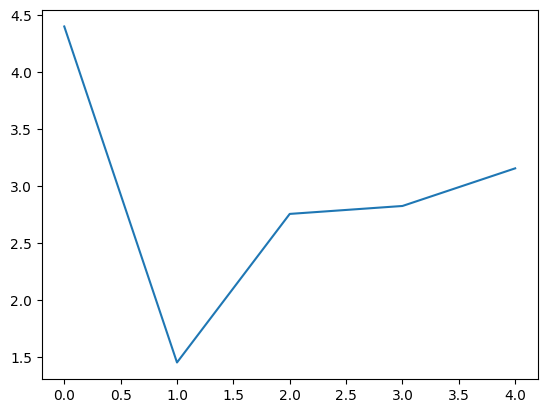

In [ ]:
plt.plot(mse_score)

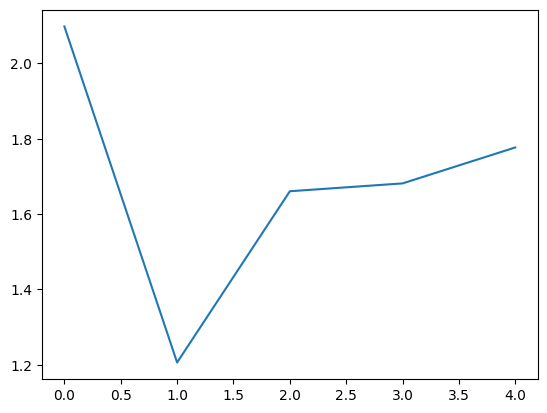

In [ ]:
plt.plot(rmse_score)

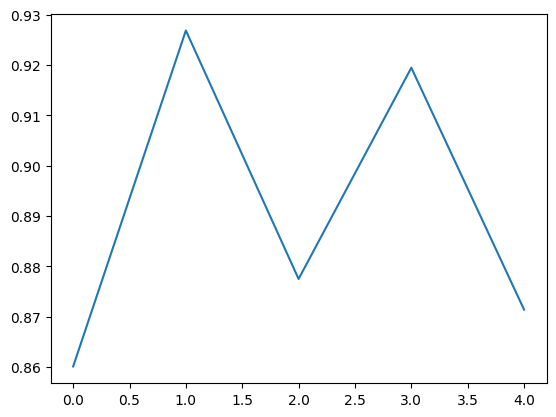

In [ ]:
plt.plot(r2_scores)